In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#pip install openpyxl
df=pd.read_excel("D:\Flight Fare Prediction\Data_Train.xlsx")  #Openpyxl is a Python library used for reading and writing Excel files

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [7]:
#the value_counts() method from the pandas package to evaluate the class distribution from our dataset.
df["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [8]:
df.shape

(10683, 11)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day #To extract the day


In [13]:
#df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format="%d%m%Y").dt.month
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month


In [14]:
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [15]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)#axis 1 refers column  ,When inplace=True, the operation is performed in place, meaning it modifies the original DataFrame and returns None.

In [16]:
#Extracting hours minutes of arrival
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"],axis=1,inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3442692184.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3442692184.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute


In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"]=pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\366076109.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\366076109.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_minute"]=pd.to_datetime(df["Arrival_Time"]).dt.minute


In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
#Duration extraction
# Assuming df is your DataFrame containing the dataset
duration_hours = []
duration_minutes = []

# Iterate over each row in the DataFrame
for duration in df["Duration"]:
    # Split the duration string based on the "h" and "m" characters
    parts = duration.split()

    # Extract hours and minutes from the split parts
    hours = 0
    minutes = 0
    for part in parts:
        if "h" in part:
            hours = int(part[:-1])  # Extract the numeric part and convert to integer.[:-1] means "start from the beginning of the string and go up to (but not including) the last character".
        elif "m" in part:
            minutes = int(part[:-1])  # Extract the numeric part and convert to integer

    # Append extracted hours and minutes to the respective lists
    duration_hours.append(hours)
    duration_minutes.append(minutes)

# Add duration hours and minutes as new columns to the DataFrame
df["Duration_hours"] = duration_hours
df["Duration_minutes"] = duration_minutes


In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
#Handling categorical data
df["Airline"].value_counts() #nominal data-Onehotencoder

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\

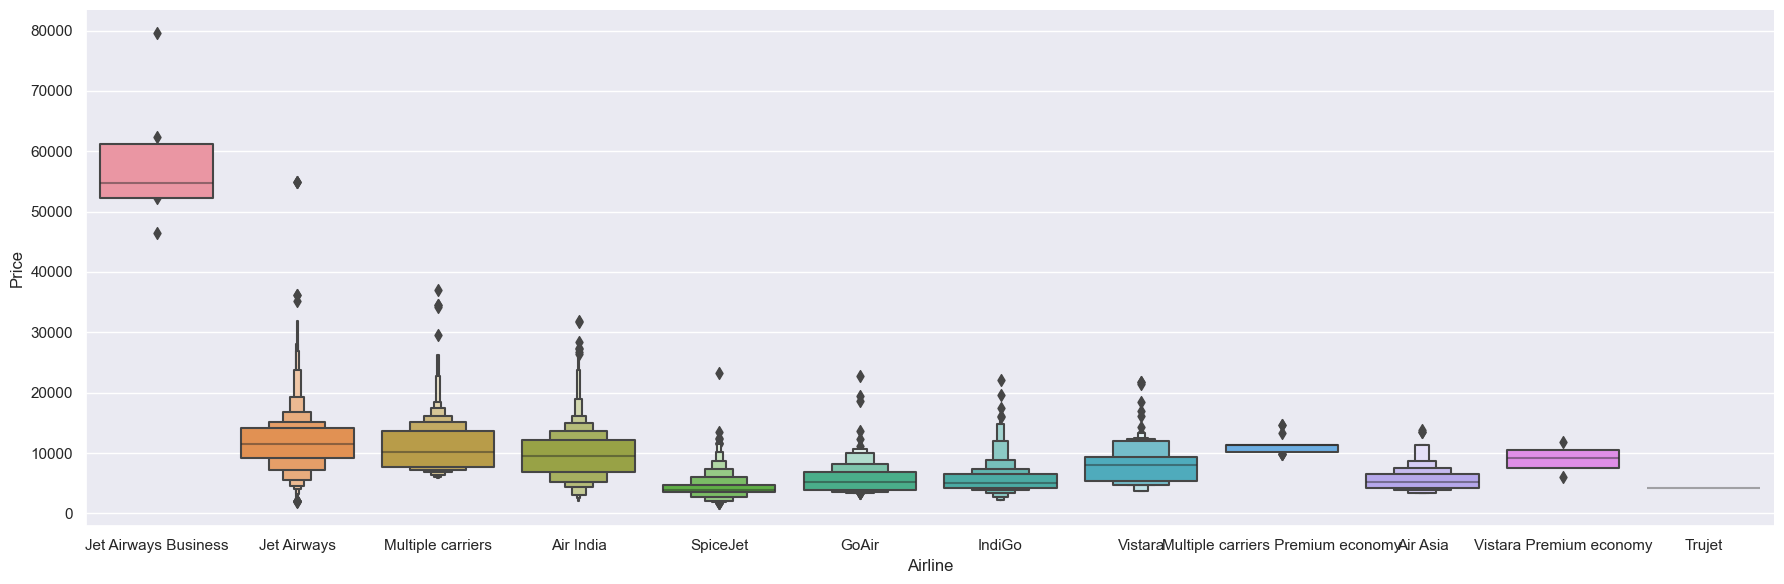

In [23]:
#Airplane vs Price
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [24]:
Airline=df[["Airline"]]
Airline=pd.get_dummies(df["Airline"],drop_first=True) #onehotEncoding
Airline.head() #Each observation now has a numerical representation suitable for machine learning algorithms.


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [25]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\

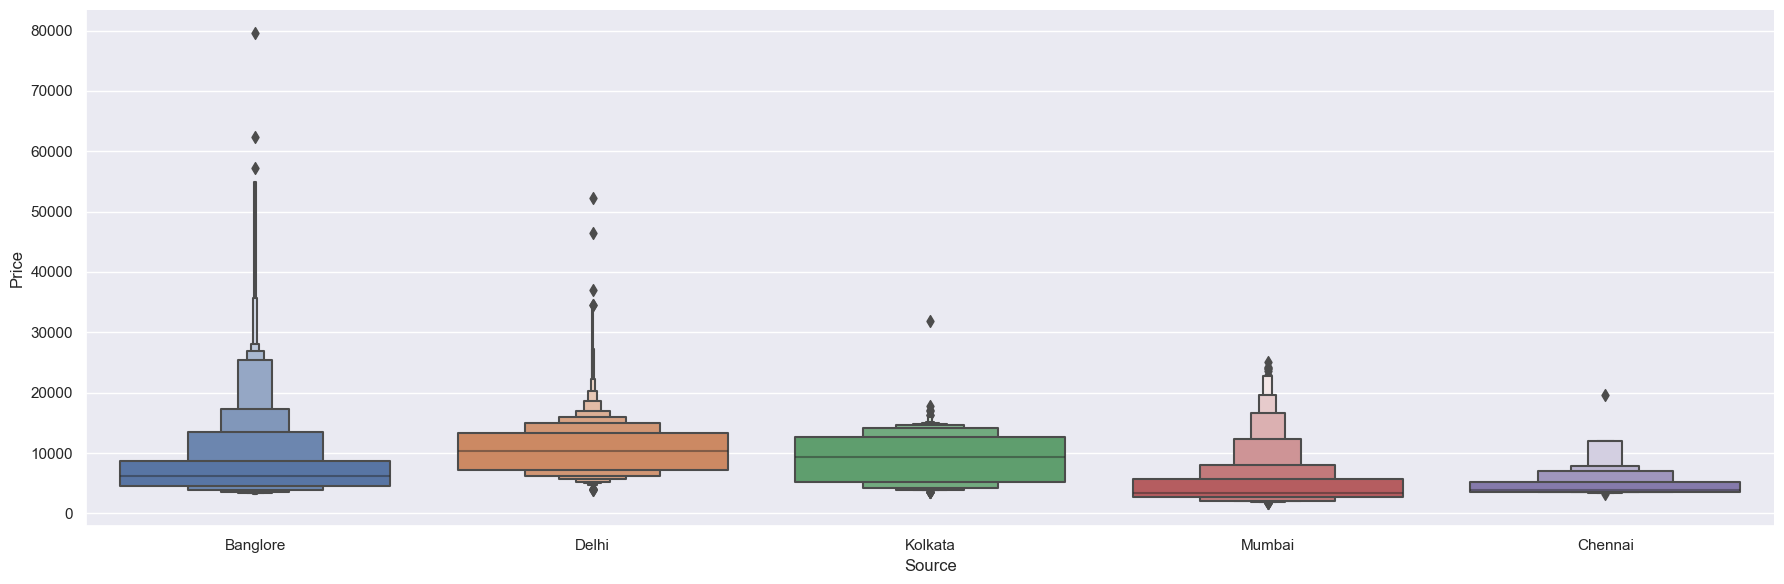

In [26]:
#source vs price
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [27]:
Source=df[["Source"]]
Source=pd.get_dummies(df["Source"],drop_first=True) #onehotEncoding
Source.head() #Each observation now has a numerical representation suitable for machine learning algorithms.


,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [28]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\

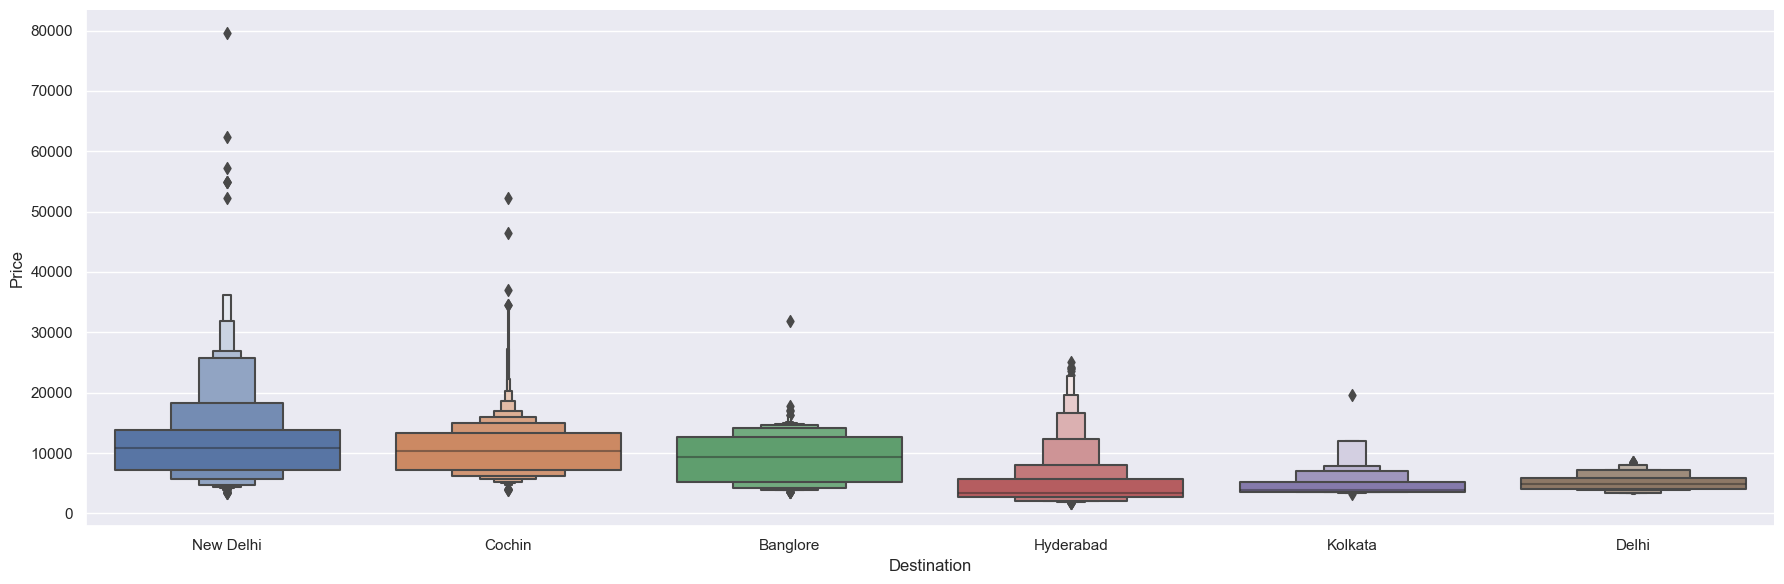

In [29]:
#source vs price
sns.catplot(y="Price",x="Destination",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [30]:
Destination=df[["Destination"]]
Destination=pd.get_dummies(df["Destination"],drop_first=True) #onehotEncoding
Destination.head() #Each observation now has a numerical representation suitable for machine learning algorithms.


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [32]:
#df=pd.read_excel("D:\Flight Fare Prediction\Data_Train.xlsx") 

In [33]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [34]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [35]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
#key-value pair,Dictionary mapping;replace() method searches for occurrences of the key (i.e., the value to be replaced) in the DataFrame and replaces them with the corresponding value (i.e., the replacement value).
#As its a case of Ordinal category tyoe,thats why label encoder
df=df.replace({"non-stop":0,
           "1 stop":1,
           "2 stops":2,
           "3 stops":3,
           "4 stops":4})

In [37]:
#Concatenating the dataframs ---df+Destination+Source+Airline
df1=pd.concat([df,Airline,Destination,Source],axis=1)

In [38]:
df1.drop(['Airline','Source','Destination','Duration'],axis=1,inplace=True)

In [39]:
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [40]:
df1.shape

(10682, 30)

Test Set
#Separately train test data for data leakage.It may lead to overfitting.

In [41]:
df_test=pd.read_excel("D:\Flight Fare Prediction\Test_set.xlsx") 

In [42]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
#Preprocessing
df_test.info()
#df_test.describe
df_test.isnull().sum()
df_test.dropna
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [44]:
df_test["Journey_day"]=pd.to_datetime(df_test["Date_of_Journey"],format="%d/%m/%Y").dt.day #To extract the day
df_test["Journey_month"]=pd.to_datetime(df_test["Date_of_Journey"],format="%d/%m/%Y").dt.month #To extract the day
#Extracting hours minutes of arrival
df_test["Dep_hour"]=pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_minute"]=pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"],axis=1,inplace=True)
df_test["Arrival_hour"]=pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_minute"]=pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop(["Arrival_Time","Date_of_Journey"],axis=1,inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3805050521.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test["Dep_hour"]=pd.to_datetime(df_test["Dep_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3805050521.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test["Dep_minute"]=pd.to_datetime(df_test["Dep_Time"]).dt.minute
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3805050521.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test["Arrival_hour"]=pd.to_datetime(df_test["Arrival_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp

In [45]:
# Assuming df is your DataFrame containing the dataset
duration_hours = []
duration_minutes = []

# Iterate over each row in the DataFrame
for duration in df_test["Duration"]:
    # Split the duration string based on the "h" and "m" characters
    parts = duration.split()

    # Extract hours and minutes from the split parts
    hours = 0
    minutes = 0
    for part in parts:
        if "h" in part:
            hours = int(part[:-1])  # Extract the numeric part and convert to integer.[:-1] means "start from the beginning of the string and go up to (but not including) the last character".
        elif "m" in part:
            minutes = int(part[:-1])  # Extract the numeric part and convert to integer

    # Append extracted hours and minutes to the respective lists
    duration_hours.append(hours)
    duration_minutes.append(minutes)

# Add duration hours and minutes as new columns to the DataFrame
df_test["Duration_hours"] = duration_hours
df_test["Duration_minutes"] = duration_minutes

In [46]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [47]:
df_test=df_test.replace({"non-stop":0,
"1 stop":1,
"2 stop":2,
"3 stop":3,
"4 stop":4})

In [48]:
Airline=df_test[["Airline"]]
Airline=pd.get_dummies(df_test["Airline"],drop_first=True) #onehotEncoding
Airline.head() #Each observation now has a numerical representation suitable for machine learning algorithms.

Source=df_test[["Source"]]
Source=pd.get_dummies(df_test["Source"],drop_first=True) #onehotEncoding
#Airline.head() #Each observation now has a numerical representation suitable for machine learning algorithms.

Destination=df_test[["Destination"]]
Destination=pd.get_dummies(df_test["Destination"],drop_first=True) #onehotEncoding
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,24,6,23,55,2,45,2,50


In [49]:
#Concatenating the dataframs ---df+Destination+Source+Airline
df_test1=pd.concat([df_test,Airline,Destination,Source],axis=1)
df_test1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


Feature Selection
Finding out the best feature whichh will contribute and have good relation with the target variable
1.heatmap
2.feature_importance
3.selectKBest

In [50]:
df1.shape
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'],
      dtype='object')

In [51]:
X=df1.loc[:,['Total_Stops',  'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [52]:
#Dependent var
y=df1.iloc[:,1] #:.iloc[] Method: The .iloc[] method is used to select data from the DataFrame based on integer location. It allows you to select rows and columns by their integer index positions.
y.head()  #The : indicates that you want to select all rows.
#The 1 indicates that you want to select the column at index position 1.

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# 

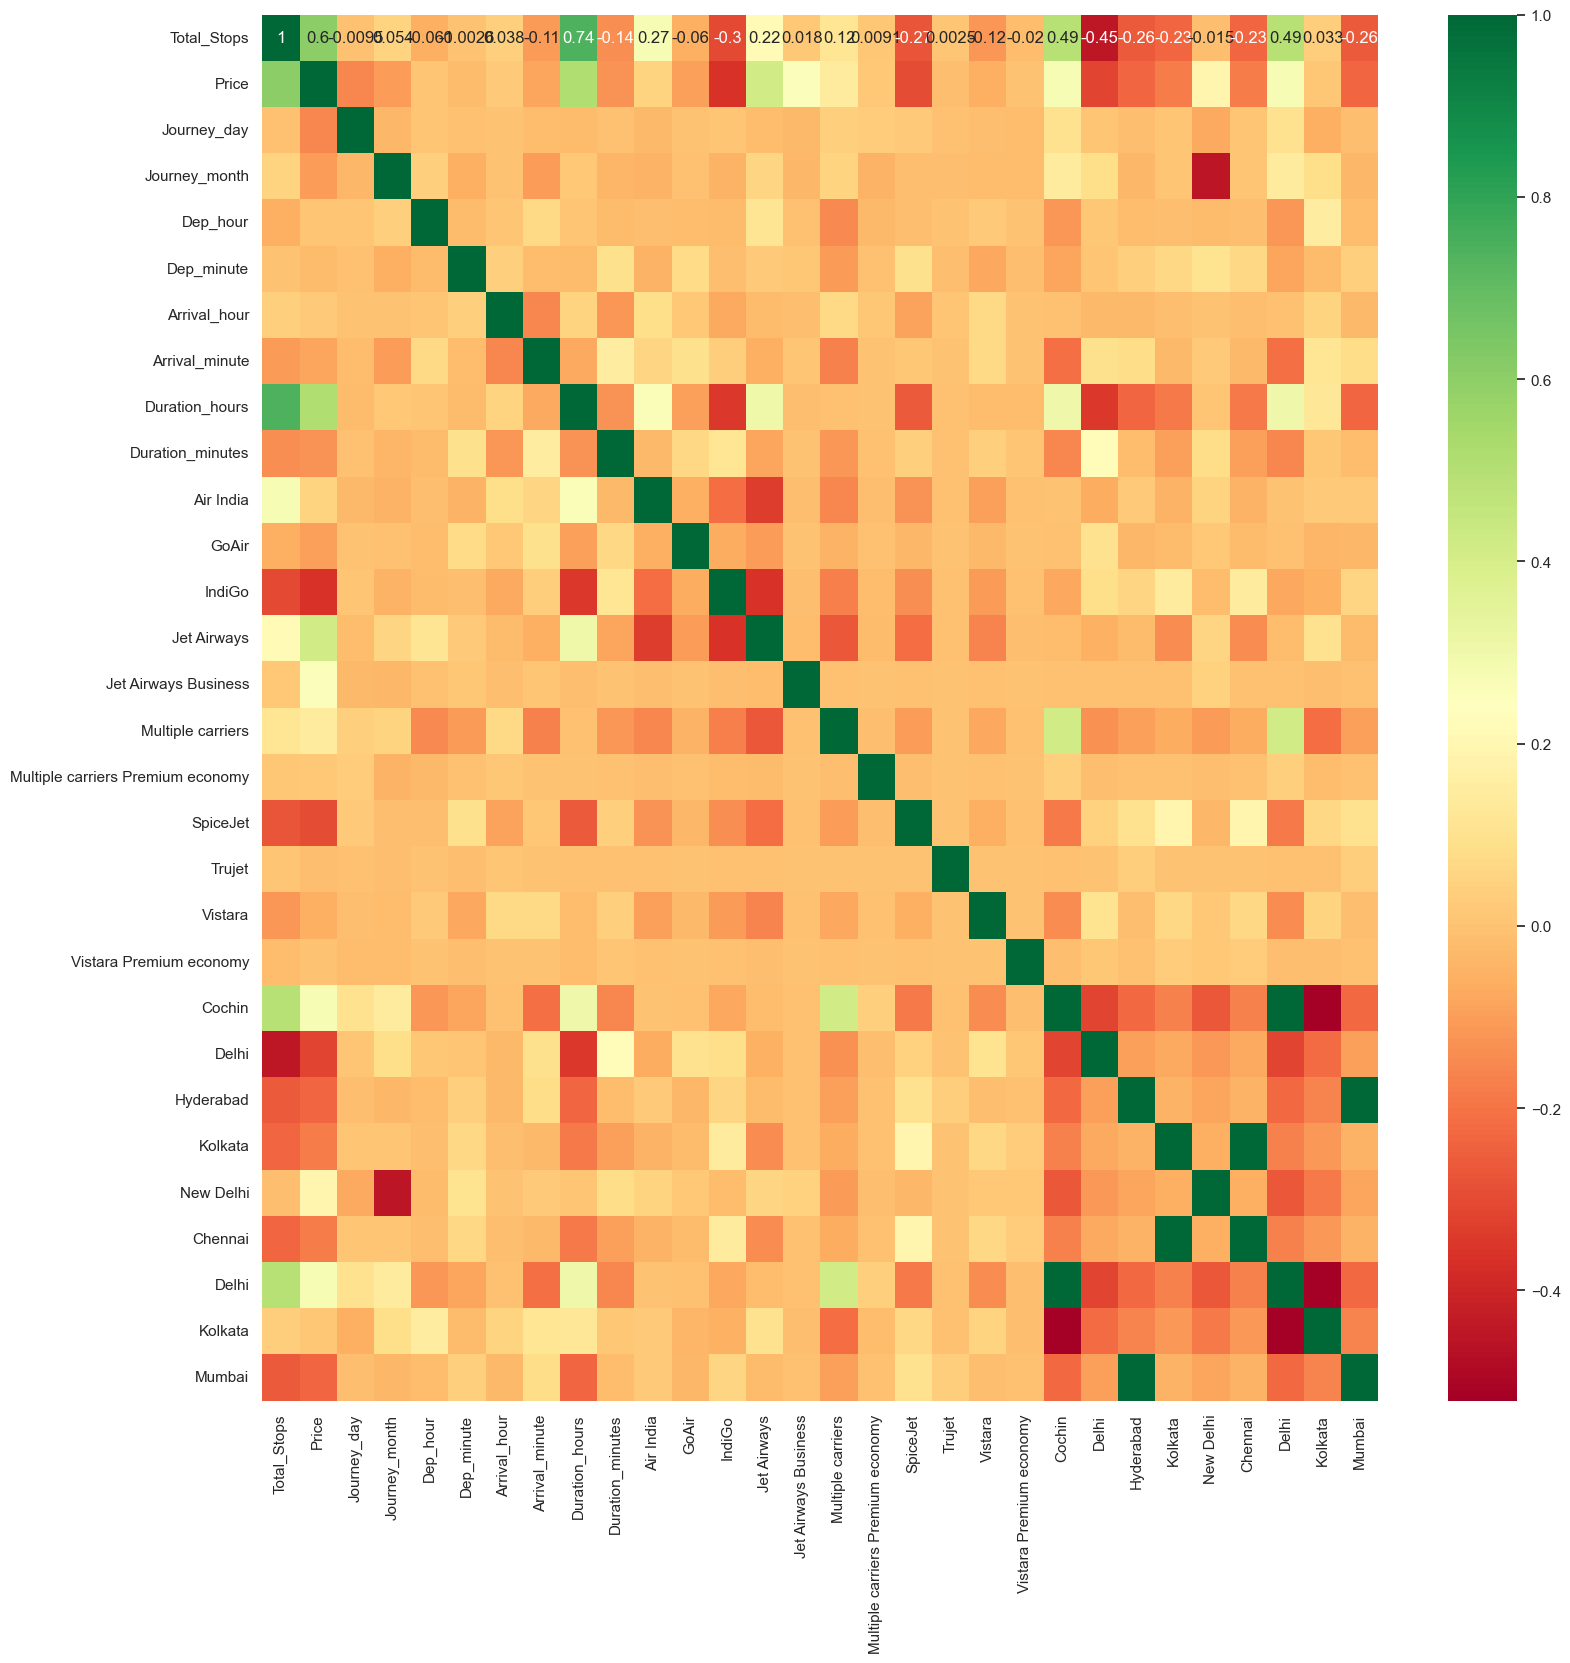

In [53]:
#Correlation between dependent and independent variable
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [54]:
import sklearn
print(sklearn.__version__)
#pip install scikit-learn

!pip install --index-url=https://pypi.org/simple scikit-learn


1.4.0


In [55]:
!pip install --upgrade scikit-learn

In [56]:
#!pip install scikit-learn
!pip install scikit-learn
#from sklearn.utils._pprint import pprint


In [57]:
#Important feature using ExtraTreesRegressor
#from sklearn import ExtrTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor  # Correct import statement
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)#selection.feature_importances_ is typically an attribute of tree-based models like Random Forest, Gradient Boosting, or Extra Trees, which calculates the importance of each feature in predicting the target variable.

[2.19027742e-01 1.44476360e-01 5.30602575e-02 2.44862956e-02
 2.11657004e-02 2.72303526e-02 1.92612879e-02 1.31607632e-01
 1.76979014e-02 1.01330001e-02 1.71858541e-03 1.71364297e-02
 1.36346761e-01 6.81713086e-02 1.86794706e-02 8.88350639e-04
 2.70380842e-03 1.02918856e-04 5.10462061e-03 8.29049451e-05
 9.00842513e-03 1.05521784e-02 8.98986702e-03 6.37647633e-03
 3.94731957e-04 1.98673683e-03 2.46715855e-02 2.67511226e-04
 4.03091576e-03 5.91314492e-03 4.15737920e-04 1.64351846e-03
 6.66748175e-03]


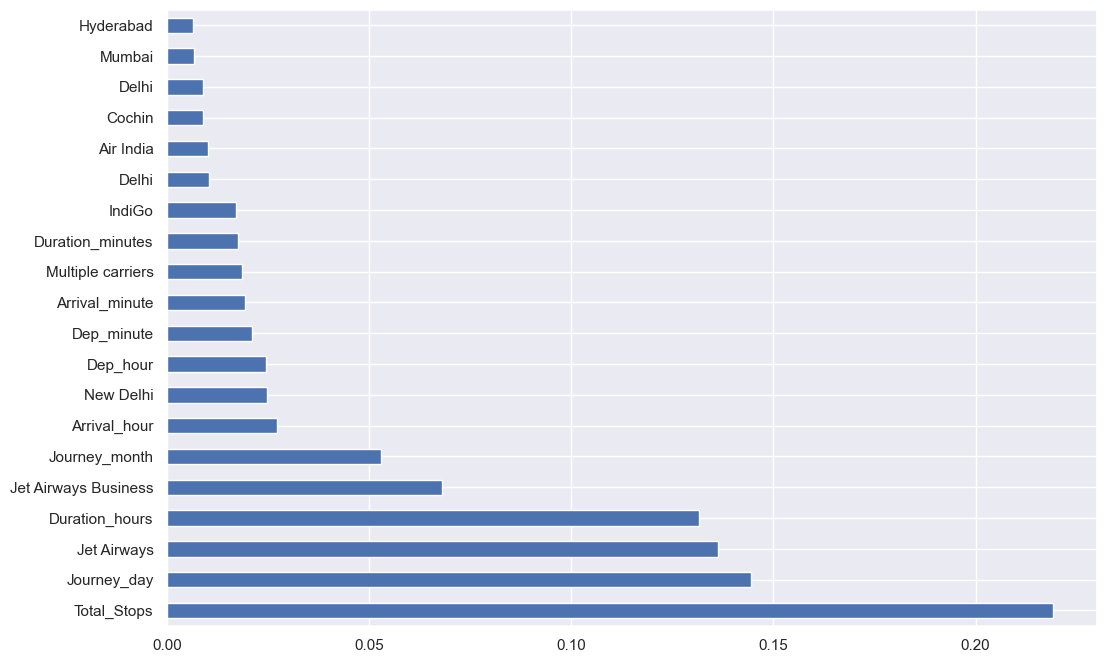

In [59]:
#plotting the graph of feature importance
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)#pd.Series() creates a pandas Series object containing feature importances as values and column names as index. X.columns represents the column names of your feature matrix X.
feat_importances.nlargest(20).plot(kind='barh') #This line selects the top 20 features with the largest importances using nlargest() method and then plots them as a horizontal bar chart (kind='barh'
plt.show()

In [60]:
#Fitting model into random forest
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
y_pred=reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_train,y_train)

0.9532462938228395

In [64]:
reg_rf.score(X_test,y_test)

0.7865839960397087

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


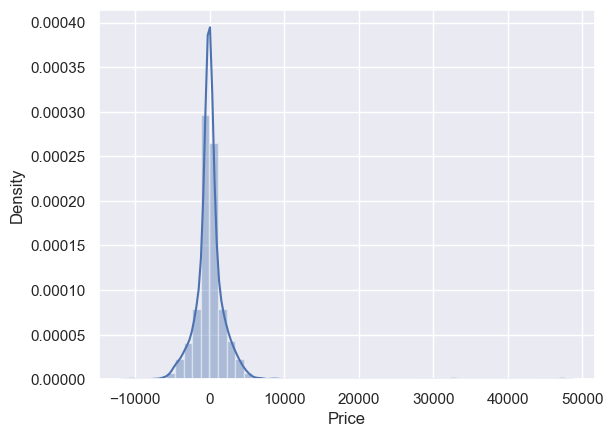

In [65]:
sns.distplot(y_test-y_pred)
plt.show()

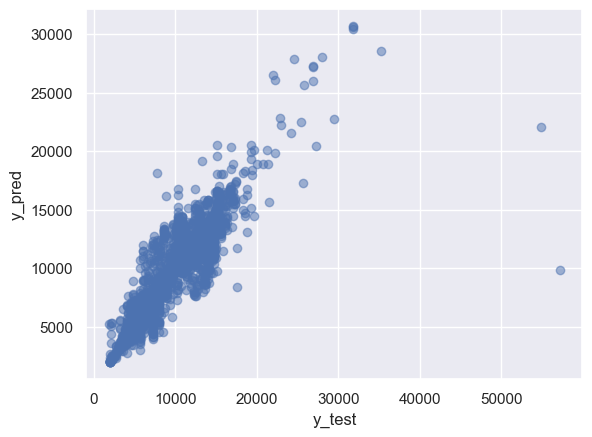

In [66]:
plt.scatter(y_test,y_pred,alpha=.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE :  1166.9805148823255
MSE :  4531578.716521708
RMSE :  2128.750505935749


In [68]:
metrics.r2_score(y_test,y_pred)

0.7865839960397087

###HyPERPARAMETER TUNING
#1.RandomizedSearchCV
GridSearch
Assigning hm in form of dictionary
fit the model
Check best parameter and best score



In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# R S CV
#Number of trees in a random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=['auto','sqrt']
#Max number of levels in a tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [71]:
#Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':['sqrt','log2',None],
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [72]:
#Random search of parameter,using 5 fold cross validation,
#search across 100 dif combination
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1,error_score='raise')

In [73]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 25}

In [75]:
prediction=rf_random.predict(X_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13056\3865557949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


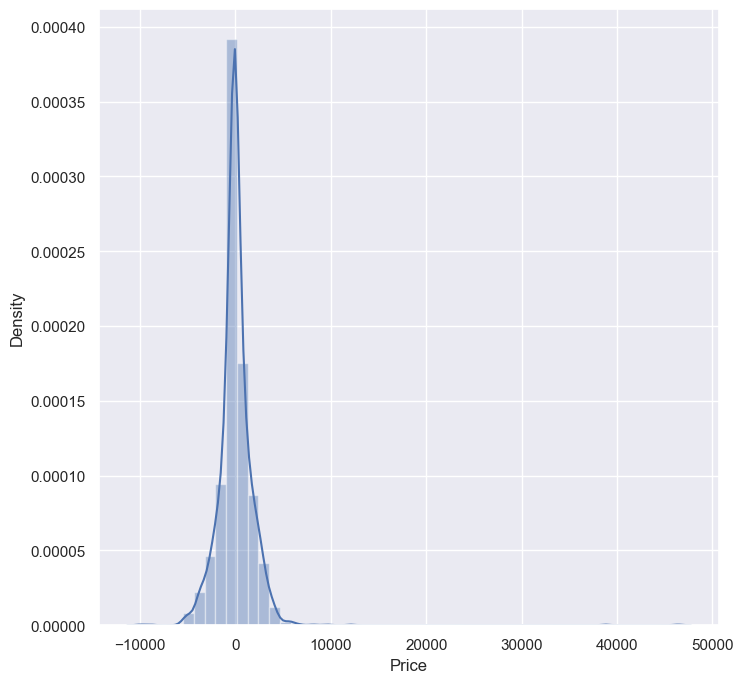

In [76]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

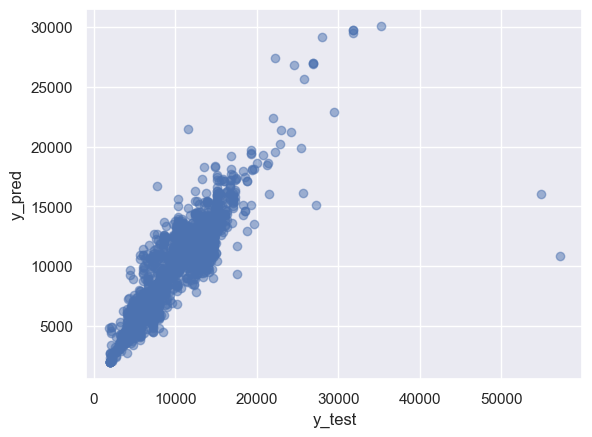

In [77]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [78]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE :  1135.751169919062
MSE :  4353779.893800187
RMSE :  2086.571324877294


Saving the model to reuse it again


In [79]:
import pickle
#open a file,where you want to store the data
file=open('flight_rf.pkl','wb')
#dumping infos to that file
pickle.dump(rf_random,file)

In [80]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)


In [81]:
y_prediction= forest.predict(X_test)

In [82]:
metrics.r2_score(y_test,y_prediction)

0.7949574827708841

In [ ]:
from flask import Flask, request, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd

app = Flask(__name__)
model = pickle.load(open("flight_rf.pkl", "rb"))


@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")

@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":

        # Date_of_Journey
        date_dep = request.form["Dep_Time"]
        Journey_day = int(pd.to_datetime(date_dep, format="%Y-%m-%dT%H:%M").day)
        Journey_month = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").month)
        # print("Journey Date : ",Journey_day, Journey_month)

        # Departure
        Dep_hour = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").hour)
        Dep_min = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").minute)
        # print("Departure : ",Dep_hour, Dep_min)

        # Arrival
        date_arr = request.form["Arrival_Time"]
        Arrival_hour = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").hour)
        Arrival_min = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").minute)
        # print("Arrival : ", Arrival_hour, Arrival_min)

        # Duration
        dur_hour = abs(Arrival_hour - Dep_hour)
        dur_min = abs(Arrival_min - Dep_min)
        # print("Duration : ", dur_hour, dur_min)

        # Total Stops
        Total_stops = int(request.form["stops"])
        # print(Total_stops)

        # Airline
        # AIR ASIA = 0 (not in column)
        airline=request.form['airline']
        if(airline=='Jet Airways'):
            Jet_Airways = 1
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='IndiGo'):
            Jet_Airways = 0
            IndiGo = 1
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='Air India'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 1
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Multiple carriers'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 1
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='SpiceJet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 1
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Vistara'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 1
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='GoAir'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 1
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Multiple carriers Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 1
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Jet Airways Business'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 1
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Vistara Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 1
            Trujet = 0
            
        elif (airline=='Trujet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 1

        else:
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        # print(Jet_Airways,
        #     IndiGo,
        #     Air_India,
        #     Multiple_carriers,
        #     SpiceJet,
        #     Vistara,
        #     GoAir,
        #     Multiple_carriers_Premium_economy,
        #     Jet_Airways_Business,
        #     Vistara_Premium_economy,
        #     Trujet)

        # Source
        # Banglore = 0 (not in column)
        Source = request.form["Source"]
        if (Source == 'Delhi'):
            s_Delhi = 1
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Kolkata'):
            s_Delhi = 0
            s_Kolkata = 1
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Mumbai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 1
            s_Chennai = 0

        elif (Source == 'Chennai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 1

        else:
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        # print(s_Delhi,
        #     s_Kolkata,
        #     s_Mumbai,
        #     s_Chennai)

        # Destination
        # Banglore = 0 (not in column)
        Source = request.form["Destination"]
        if (Source == 'Cochin'):
            d_Cochin = 1
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0
        
        elif (Source == 'Delhi'):
            d_Cochin = 0
            d_Delhi = 1
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'New_Delhi'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 1
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'Hyderabad'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 1
            d_Kolkata = 0

        elif (Source == 'Kolkata'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 1

        else:
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

        # print(
        #     d_Cochin,
        #     d_Delhi,
        #     d_New_Delhi,
        #     d_Hyderabad,
        #     d_Kolkata
        # )
        

    #     ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
    #    'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
    #    'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
    #    'Airline_Jet Airways', 'Airline_Jet Airways Business',
    #    'Airline_Multiple carriers',
    #    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
    #    'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
    #    'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
    #    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
    #    'Destination_Kolkata', 'Destination_New Delhi']
        
        prediction=model.predict([[
            Total_stops,
            Journey_day,
            Journey_month,
            Dep_hour,
            Dep_min,
            Arrival_hour,
            Arrival_min,
            dur_hour,
            dur_min,
            Air_India,
            GoAir,
            IndiGo,
            Jet_Airways,
            Jet_Airways_Business,
            Multiple_carriers,
            Multiple_carriers_Premium_economy,
            SpiceJet,
            Trujet,
            Vistara,
            Vistara_Premium_economy,
            s_Chennai,
            s_Delhi,
            s_Kolkata,
            s_Mumbai,
            d_Cochin,
            d_Delhi,
            d_Hyderabad,
            d_Kolkata,
            d_New_Delhi
        ]])

        output=round(prediction[0],2)

        return render_template('home.html',prediction_text="Your Flight price is Rs. {}".format(output))


    return render_template("home.html")





if __name__ == "__main__":
    app.run(debug=True)
